In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pickle
import os
from sklearn.metrics import *

In [2]:
path = 'Results/'
list_data = os.listdir(path)
list_data.remove('IMG')
list_data

['breastcancer_pred.pkl',
 'breastcancer_true.pkl',
 'early_stage_pred.pkl',
 'early_stage_true.pkl',
 'heart_disease_pred.pkl',
 'heart_disease_true.pkl',
 'pima_pred.pkl',
 'pima_true.pkl']

In [3]:
data = []
for i in range(len(list_data)):
    temp = {}
    temp['Name'] = list_data[i][:-9]
    temp['Data'] = pickle.load(open(path+list_data[i], 'rb'))
    data.append(temp)

In [4]:
df = pd.DataFrame(columns=['Data', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUROC'])
type(df)

pandas.core.frame.DataFrame

In [5]:
from torchmetrics.functional.classification import binary_accuracy, binary_precision, binary_recall, binary_f1_score, binary_auroc
from torchmetrics.classification import BinaryAccuracy, BinaryPrecision, BinaryRecall, BinaryF1Score, BinaryAUROC
import torch

In [6]:
bc_accuracy = BinaryAccuracy()
bc_precision = BinaryPrecision()
bc_recall = BinaryRecall()
bc_f1score = BinaryF1Score()
bc_auroc = BinaryAUROC()

for i in range(10):
    trues = torch.tensor(data[1]['Data'][i])
    preds = torch.tensor(data[0]['Data'][i].flatten())
    bc_accuracy.update(preds, trues)
    bc_precision.update(preds, trues)
    bc_recall.update(preds, trues)
    bc_f1score.update(preds, trues)
    bc_auroc.update(preds, trues)

temp = {
    'Data': 'Breast Cancer',
    'Accuracy': bc_accuracy.compute().item(),
    'Precision': bc_precision.compute().item(),
    'Recall': bc_recall.compute().item(),
    'F1 Score': bc_f1score.compute().item(),
    'AUROC': bc_auroc.compute().item()
}

df = pd.concat([df, pd.DataFrame(temp, index=[0])], ignore_index=True)
df

C:\Users\Muhammad Rifqi Fauzi\AppData\Local\Temp\ipykernel_28544\835930063.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(temp, index=[0])], ignore_index=True)


,Data,Accuracy,Precision,Recall,F1 Score,AUROC
0,Breast Cancer,0.959578,0.970149,0.919811,0.94431,0.982533


In [7]:
esr_accuracy = BinaryAccuracy()
esr_precision = BinaryPrecision()
esr_recall = BinaryRecall()
esr_f1score = BinaryF1Score()
esr_auroc = BinaryAUROC()

for i in range(10):
    trues = torch.tensor(data[3]['Data'][i])
    preds = torch.tensor(data[2]['Data'][i].flatten())
    esr_accuracy.update(preds, trues)
    esr_precision.update(preds, trues)
    esr_recall.update(preds, trues)
    esr_f1score.update(preds, trues)
    esr_auroc.update(preds, trues)

temp = {
    'Data': 'Early Stage Risk',
    'Accuracy': esr_accuracy.compute().item(),
    'Precision': esr_precision.compute().item(),
    'Recall': esr_recall.compute().item(),
    'F1 Score': esr_f1score.compute().item(),
    'AUROC': esr_auroc.compute().item()
}

df = pd.concat([df, pd.DataFrame(temp, index=[0])], ignore_index=True)
df

,Data,Accuracy,Precision,Recall,F1 Score,AUROC
0,Breast Cancer,0.959578,0.970149,0.919811,0.944310,0.982533
1,Early Stage Risk,0.876494,0.927711,0.890173,0.908555,0.915592


In [8]:
from torchmetrics.functional.classification import multilabel_accuracy, multilabel_precision, multilabel_recall, multilabel_f1_score, multilabel_auroc
from torchmetrics.classification import MultilabelAccuracy, MultilabelPrecision, MultilabelRecall, MultilabelF1Score, MultilabelAUROC

hd_accuracy = MultilabelAccuracy(num_labels=5)
hd_precision = MultilabelPrecision(num_labels=5)
hd_recall = MultilabelRecall(num_labels=5)
hd_f1score = MultilabelF1Score(num_labels=5)
hd_auroc = MultilabelAUROC(num_labels=5)

for i in range(10):
    trues = torch.tensor(data[5]['Data'][i], dtype=torch.long)
    preds = torch.tensor(data[4]['Data'][i])
    hd_accuracy.update(preds, trues)
    hd_precision.update(preds, trues)
    hd_recall.update(preds, trues)
    hd_f1score.update(preds, trues)
    hd_auroc.update(preds, trues)

temp = {
    'Data': 'Heart Disease',
    'Accuracy': hd_accuracy.compute().item(),
    'Precision': hd_precision.compute().item(),
    'Recall': hd_recall.compute().item(),
    'F1 Score': hd_f1score.compute().item(),
    'AUROC': hd_auroc.compute().item()
}

df = pd.concat([df, pd.DataFrame(temp, index=[0])], ignore_index=True)
df


,Data,Accuracy,Precision,Recall,F1 Score,AUROC
0,Breast Cancer,0.959578,0.970149,0.919811,0.944310,0.982533
1,Early Stage Risk,0.876494,0.927711,0.890173,0.908555,0.915592
2,Heart Disease,0.883828,0.276970,0.181685,0.184525,0.810471


In [9]:
pima_accuracy = BinaryAccuracy()
pima_precision = BinaryPrecision()
pima_recall = BinaryRecall()
pima_f1score = BinaryF1Score()
pima_auroc = BinaryAUROC()

for i in range(10):
    trues = torch.tensor(data[7]['Data'][i])
    preds = torch.tensor(data[6]['Data'][i].flatten())
    pima_accuracy.update(preds, trues)
    pima_precision.update(preds, trues)
    pima_recall.update(preds, trues)
    pima_f1score.update(preds, trues)
    pima_auroc.update(preds, trues)

temp = {
    'Data': 'PIMA',
    'Accuracy': pima_accuracy.compute().item(),
    'Precision': pima_precision.compute().item(),
    'Recall': pima_recall.compute().item(),
    'F1 Score': pima_f1score.compute().item(),
    'AUROC': pima_auroc.compute().item()
}

df = pd.concat([df, pd.DataFrame(temp, index=[0])], ignore_index=True)
df

,Data,Accuracy,Precision,Recall,F1 Score,AUROC
0,Breast Cancer,0.959578,0.970149,0.919811,0.944310,0.982533
1,Early Stage Risk,0.876494,0.927711,0.890173,0.908555,0.915592
2,Heart Disease,0.883828,0.276970,0.181685,0.184525,0.810471
3,PIMA,0.748698,0.690355,0.507463,0.584946,0.815164


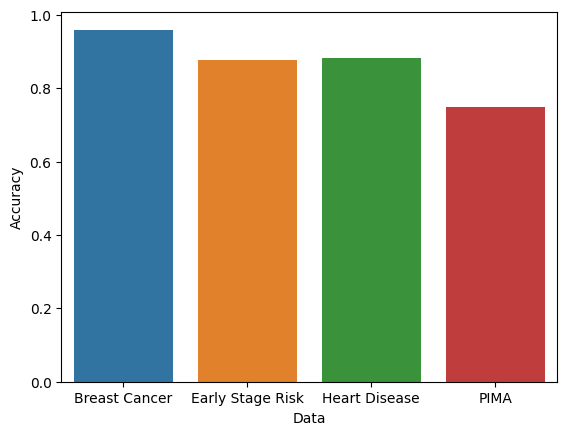

In [10]:
acc = sns.barplot(data=df, x='Data', y='Accuracy', hue='Data')
plt.savefig('Results/IMG/Accuracy.png', dpi=600, bbox_inches='tight')

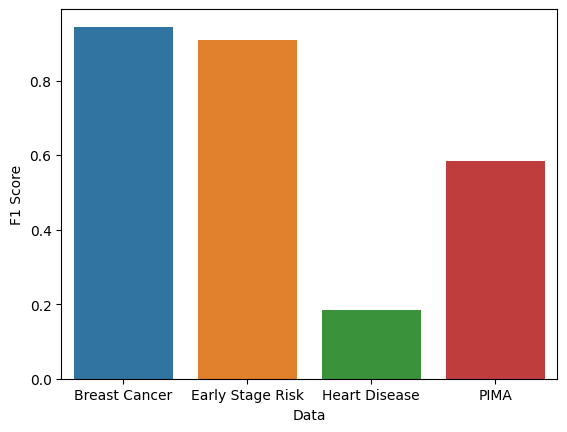

In [11]:
f1 = sns.barplot(data=df, x='Data', y='F1 Score', hue='Data')
plt.savefig('Results/IMG/F1 Score.png', dpi=600, bbox_inches='tight')

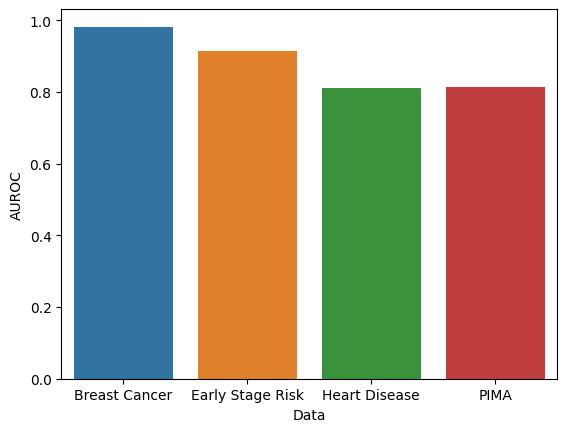

In [12]:
auc = sns.barplot(data=df, x='Data', y='AUROC', hue='Data')
plt.savefig('Results/IMG/AUROC.png', dpi=600, bbox_inches='tight')

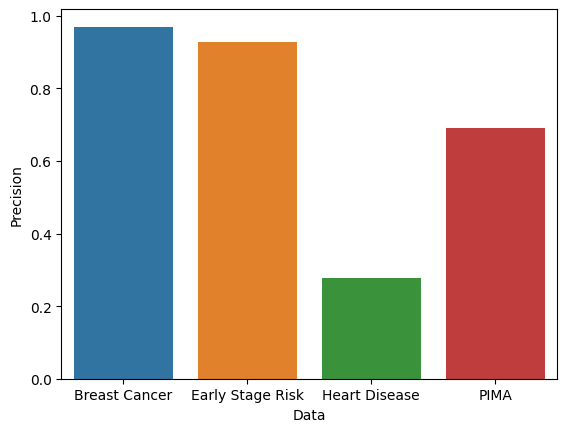

In [13]:
prec = sns.barplot(data=df, x='Data', y='Precision', hue='Data')
plt.savefig('Results/IMG/Precision.png', dpi=600, bbox_inches='tight')

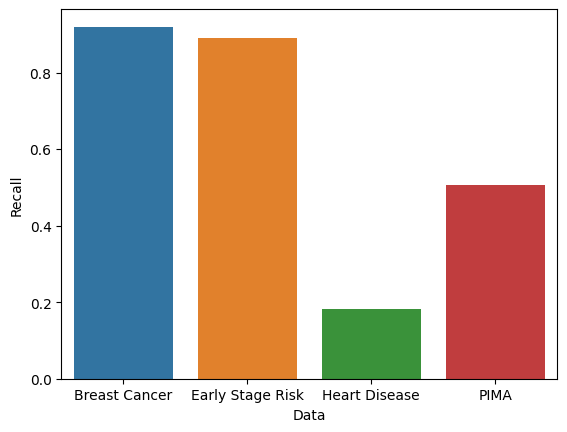

In [14]:
rec = sns.barplot(data=df, x='Data', y='Recall', hue='Data')
plt.savefig('Results/IMG/Recall.png', dpi=600, bbox_inches='tight')

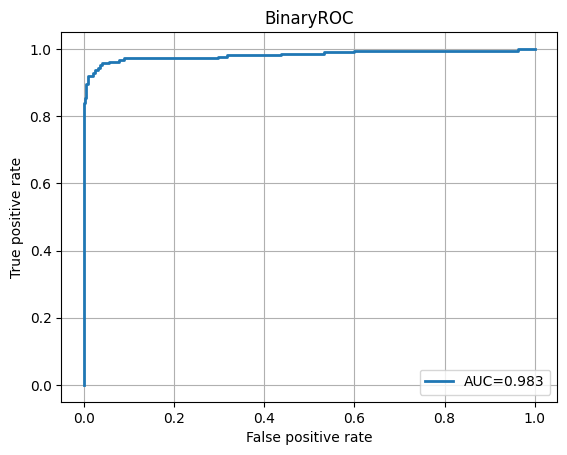

In [15]:
from torchmetrics.classification import BinaryROC
metric = BinaryROC()

for i in range(10):
    trues = torch.tensor(data[1]['Data'][i], dtype=torch.int).unsqueeze(1)
    preds = torch.tensor(data[0]['Data'][i])
    metric.update(preds, trues)
fig_, ax_ = metric.plot(score=True)

plt.savefig('Results/IMG/ROC_Breastcancer.png', dpi=600, bbox_inches='tight')

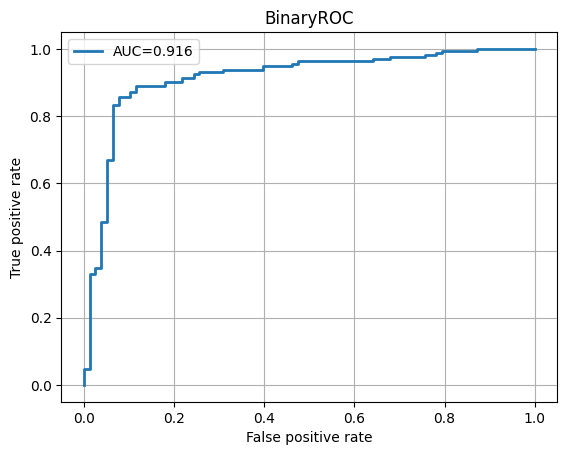

In [16]:
from torchmetrics.classification import BinaryROC
metric = BinaryROC()

for i in range(10):
    trues = torch.tensor(data[3]['Data'][i], dtype=torch.int).unsqueeze(1)
    preds = torch.tensor(data[2]['Data'][i])
    metric.update(preds, trues)
fig_, ax_ = metric.plot(score=True)

plt.savefig('Results/IMG/ROC_early_stage.png', dpi=600, bbox_inches='tight')

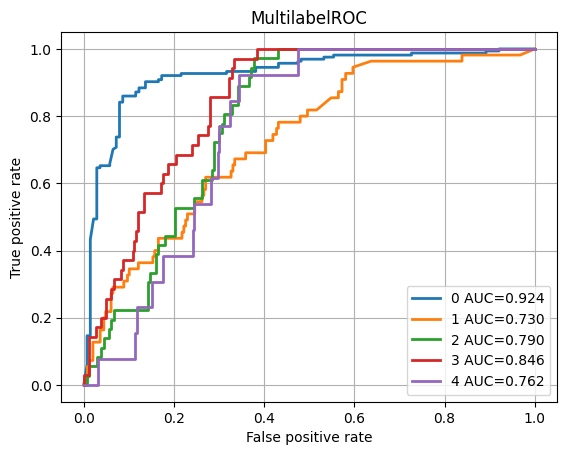

In [19]:
from torchmetrics.classification import BinaryROC, MulticlassROC, MultilabelROC
metric = MultilabelROC(num_labels=5)
for i in range(10):
    trues = torch.tensor(data[5]['Data'][i], dtype=torch.int).squeeze(0)
    preds = torch.tensor(data[4]['Data'][i])
    # print(trues.shape, preds.shape)
    metric.update(preds, trues)
fig_, ax_ = metric.plot(score=True)

plt.savefig('Results/IMG/ROC_heartdisease.png', dpi=600, bbox_inches='tight')

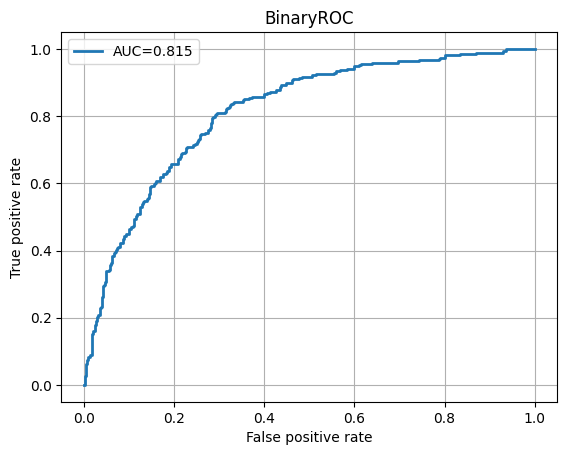

In [18]:
from torchmetrics.classification import BinaryROC

metric = BinaryROC()

for i in range(10):
    trues = torch.tensor(data[7]['Data'][i], dtype=torch.int).unsqueeze(1)
    preds = torch.tensor(data[6]['Data'][i])
    metric.update(preds, trues)
fig_, ax_ = metric.plot(score=True)

plt.savefig('Results/IMG/ROC_pima.png', dpi=600, bbox_inches='tight')